# Bellabeat Case Study
## Introduction
Bellabeat, a high-tech company that manufactures health-focused smart products wants to analyse the usage of one of their products in order to gain insight into how people are already using their smart devices.Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

Business Task
Analyzing smart device usage data to gain insight about the target market and produce recommendations to influence Bellabeat's marketing strategy.

Preparing the data
About the data
Licensing: CC0 1.0 Universal, the data provider dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. Privacy: Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. The data collected preserves their anonymousity. Source: The data was collected by Kaggle user Möbius. These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.

Limitations
The dataset deals with a very small sample size so it's important to interpret the findings with a grain of salt. In this case, the dataset is used only for presentation/practice purposes.

Importing the data
This case study uses data from four main datasets: dailyActivity_merged, sleepDay_merged, weightLogInfo_merged, and heartrate_seconds_merged.

In [1]:
#importing libraries

library(tidyverse)
library(ggplot2)
library(repr)
library(waffle)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
dailyactivity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepday <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightlog <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartrateseconds <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

# Exploring and cleaning our data
Let's get an initial overview on the data we're going to analyse. This will enable us to know what information is collected as well as make sure the columns have the right data format.

## dailyactivity dataset
Checking for duplicate data and counting number of users.

In [3]:
glimpse(dailyactivity)
nrow(dailyactivity[duplicated(dailyactivity),])
n_distinct(dailyactivity$Id)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 0

[1] 33

## sleepday dataset
Checking for duplicate data and counting number of users.

In [4]:
glimpse(sleepday)
nrow(sleepday[duplicated(sleepday),])
n_distinct(sleepday$Id)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


[1] 3

[1] 24

As opposed to the activitydata dataset, the date column is in datetime format. Since we don't need the time in this dataset we can extract the date from the SleepDay to make it consistent with the activitydata dataset.
We can see that there are 3 duplicate rows that we have to get rid of
The sleepday dataset has 24 unique IDs compared to dailyactivity's 33.

In [5]:
sleepday <- unique(sleepday)
sleepday <- separate(sleepday,col=SleepDay,into=c("Date","Time"),sep = " ")
sleepday <- select(sleepday,c(-Time,-TotalSleepRecords))
head(sleepday)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 410 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Id,Date,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>
1,1503960366,4/12/2016,327,346
2,1503960366,4/13/2016,384,407
3,1503960366,4/15/2016,412,442
4,1503960366,4/16/2016,340,367
5,1503960366,4/17/2016,700,712
6,1503960366,4/19/2016,304,320


### Combining both datasets (activitydata, sleepday)
Before getting into the analysis step, let's combine both datasets to make our analysis more practical. By joining both datasets with respect to the Id and ActivityDate columns, we can put activities and sleep information in the same dataset.



In [6]:
combinedAS <- left_join(dailyactivity,sleepday,by=c("Id"="Id","ActivityDate"="Date"))

combinedAS$AwakeHours <- (combinedAS$VeryActiveMinutes + combinedAS$FairlyActiveMinutes + combinedAS$LightlyActiveMinutes + combinedAS$SedentaryMinutes)/60
combinedAS$SleepHours <- combinedAS$TotalMinutesAsleep / 60
combinedAS <- select(combinedAS, -TotalMinutesAsleep)
combinedAS[is.na(combinedAS$SleepHours),"SleepHours"] <- 0
combinedAS[is.na(combinedAS$TotalTimeInBed),"TotalTimeInBed"] <- 0

combinedAS$TotalHours <- combinedAS$AwakeHours+combinedAS$SleepHours
combinedAS$ActiveMinutes <- combinedAS$VeryActiveMinutes+combinedAS$FairlyActiveMinutes


glimpse(combinedAS)

Rows: 940
Columns: 20
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Checking for observations where the Total Hours per day exceed 24 hours and excluding them from the analysis.

Adding a UserType column that categorizes users based on their average daily active minutes (Users that exceed 60 active minutes on average are considered Active Users).

In [7]:
combinedAS_clean <- filter(combinedAS,TotalHours <= 24)

type <- select(combinedAS_clean,c('Id','ActiveMinutes'))

type <- type %>% group_by(Id) %>% summarize(AvgActiveMinutes= mean(ActiveMinutes))
type$UserType <-  case_when(type$AvgActiveMinutes > 60 ~ "Active User", TRUE ~ "Casual User",)

combinedAS_clean <- combinedAS_clean %>% left_join(select(type,c("Id","UserType")),by="Id")


## weightlog dataset

In [8]:
str(weightlog)
head(weightlog)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


The BMI column might looks like an interesting metric to explore. Let's transform the dataframe to only include the Id and BMI then add it to our combined dataset.

In [9]:
weightlog <- weightlog %>% select(c(Id,BMI))

avg_weightlog <- weightlog %>% 
  group_by(Id) %>% 
  summarise(across(everything(),list(mean)))

combinedAS_clean <- left_join(combinedAS_clean,weightlog)
glimpse(combinedAS_clean)

Joining, by = "Id"



Rows: 2,397
Columns: 22
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/12/2016", "4/13/2016", "4/13/…
$ TotalSteps               <int> 13162, 13162, 10735, 10735, 10460, 10460, 976…
$ TotalDistance            <dbl> 8.50, 8.50, 6.97, 6.97, 6.74, 6.74, 6.28, 6.2…
$ TrackerDistance          <dbl> 8.50, 8.50, 6.97, 6.97, 6.74, 6.74, 6.28, 6.2…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.88, 1.57, 1.57, 2.44, 2.44, 2.14, 2.1…
$ ModeratelyActiveDistance <dbl> 0.55, 0.55, 0.69, 0.69, 0.40, 0.40, 1.26, 1.2…
$ LightActiveDistance      <dbl> 6.06, 6.06, 4.71, 4.71, 3.91, 3.91, 2.83, 2.8…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 25, 21, 21, 30, 30, 29, 29, 36, 36, 42, 4…
$ FairlyActiveMinutes      <int> 13, 13, 19, 19, 11, 11, 34, 34, 10, 10, 16, 1…
$ LightlyActiveM

In [10]:
avg_combined <- combinedAS_clean %>% group_by(Id) %>% summarise_at(c("TotalSteps", "Calories","BMI"), mean, na.rm = TRUE)
glimpse(avg_combined)

Rows: 33
Columns: 4
$ Id         <dbl> 1503960366, 1624580081, 1644430081, 1844505072, 1927972279,…
$ TotalSteps <dbl> 12197.133, 5743.903, 7404.517, 2580.065, 820.750, 11370.645…
$ Calories   <dbl> 1819.367, 1483.355, 2819.276, 1573.484, 2152.786, 2509.968,…
$ BMI        <dbl> 22.650, NaN, NaN, NaN, 47.540, NaN, NaN, NaN, NaN, 21.570, …


## heartrateseconds dataset
This dataset has data on 14 users only.

In [11]:
glimpse(heartrateseconds)
n_distinct(heartrateseconds$Id)

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


[1] 14

In [12]:
heartrateseconds <- heartrateseconds %>% 
  separate(Time,into = c("Date","Time"), sep=" ")

dailyheartrate <- heartrateseconds %>% 
  group_by(Id,Date) %>% 
  summarise_at("Value",mean)
combinedAS_clean <- left_join(combinedAS_clean,dailyheartrate,by=c("Id"="Id","ActivityDate"="Date"))

combinedAS_clean <- rename(combinedAS_clean,"Heartrate" = "Value")

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2483658 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


# Analysis

In [13]:
avg_combined <- combinedAS_clean %>% group_by(Id) %>% summarise_at(c("TotalSteps", "Calories","SedentaryMinutes"), mean, na.rm = TRUE)

avg_combined %>%  
  select(TotalSteps,
         Calories,
         SedentaryMinutes) %>%
  summary()

   TotalSteps         Calories    SedentaryMinutes
 Min.   :  820.8   Min.   :1483   Min.   : 646.8  
 1st Qu.: 5447.7   1st Qu.:1917   1st Qu.: 790.1  
 Median : 7198.5   Median :2132   Median :1077.5  
 Mean   : 7397.0   Mean   :2262   Mean   :1004.7  
 3rd Qu.: 9305.7   3rd Qu.:2600   3rd Qu.:1206.6  
 Max.   :16040.0   Max.   :3424   Max.   :1361.0  

#### 75% of observations walk on average more than 5447 steps daily.
#### 75% of observations burn on average more than 1917 calories daily.
#### Smart device users spend over 16 hours a day in sedentary behaviors.

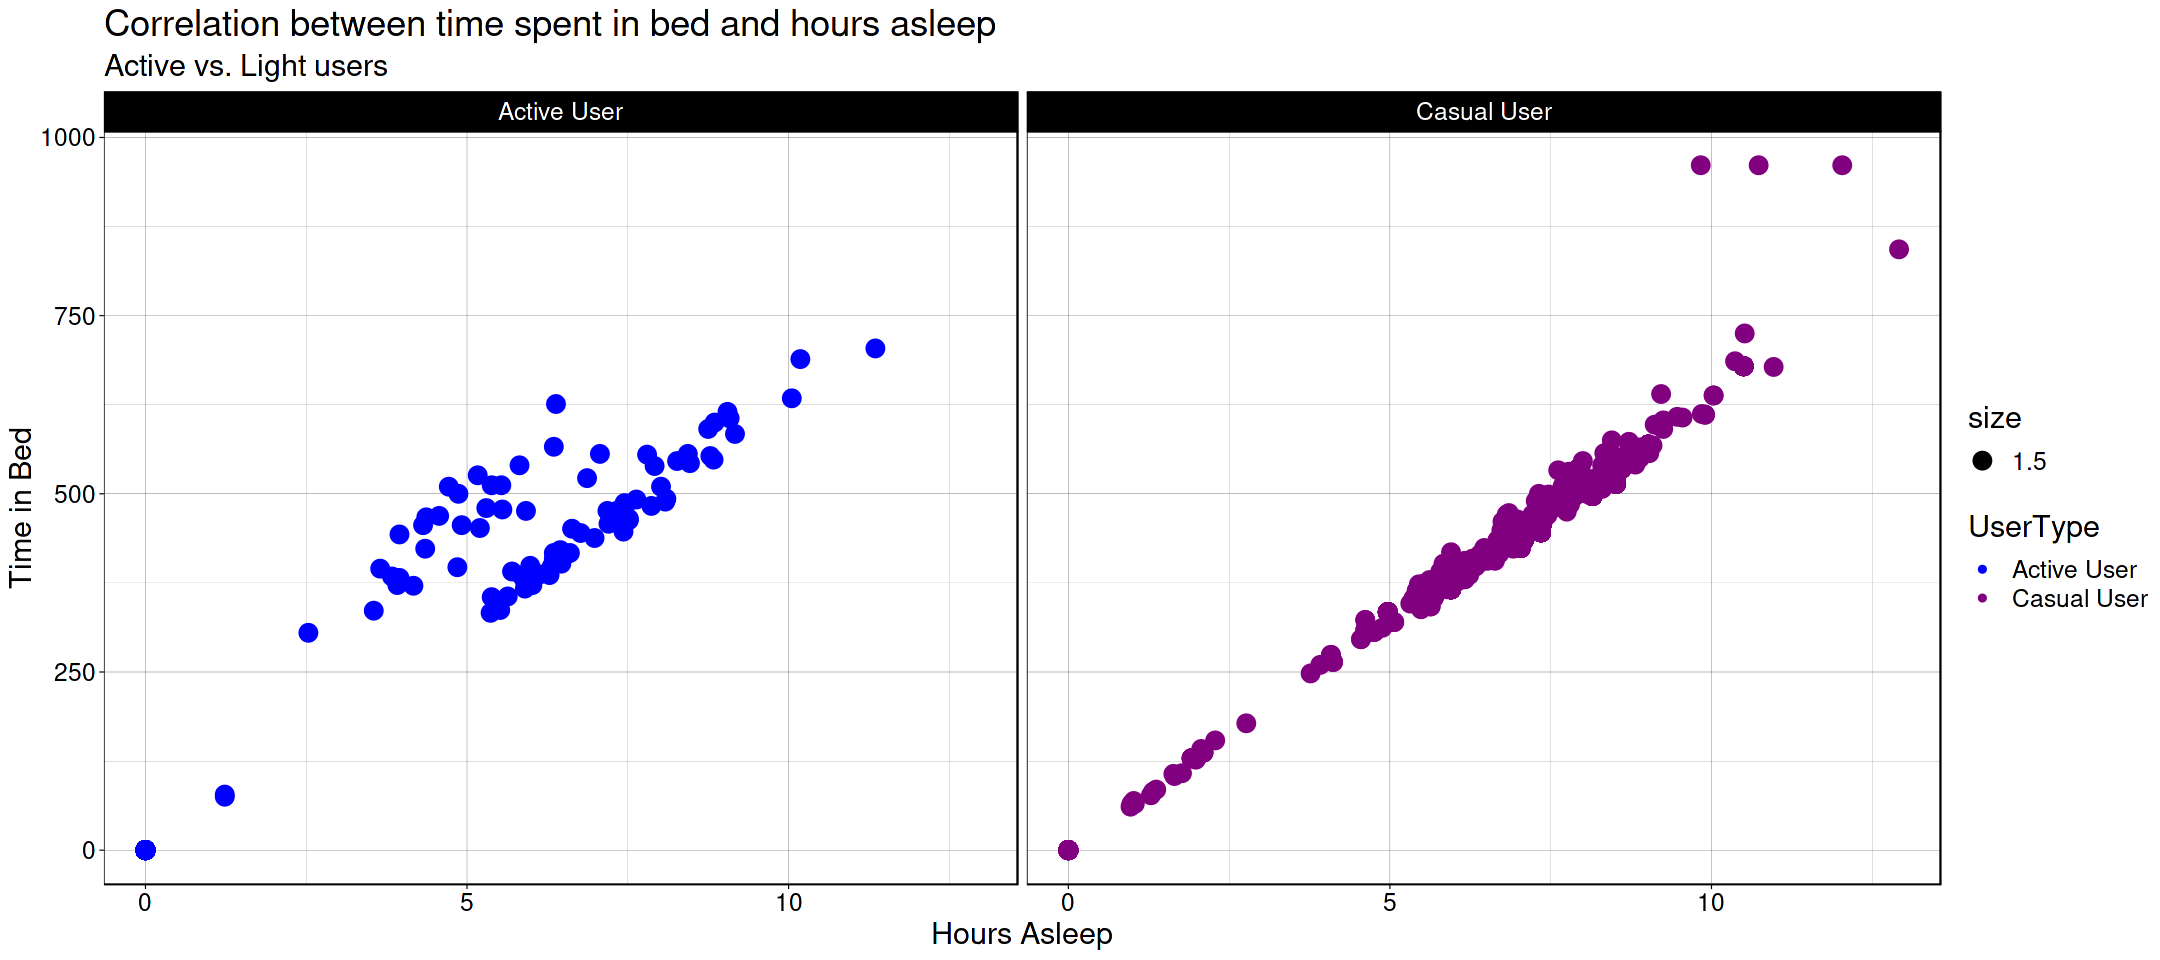

In [14]:
options(repr.plot.width=18,repr.plot.height=8)

ggplot(combinedAS_clean,aes(x=SleepHours,y=TotalTimeInBed,size = 1.5,color=UserType),alpha=0.6)+geom_point()+
labs(title="Correlation between time spent in bed and hours asleep",subtitle="Active vs. Light users",x="Hours Asleep",y="Time in Bed")+facet_wrap(~UserType)+
scale_color_manual(values=c("#0000ff","#800080"))+
theme_linedraw()+
theme(text = element_text(size = 18))

## Who represents the majority of smart device users? (Active vs Casual users)
The waffle shows that Casual users represent the majority of smart device users.

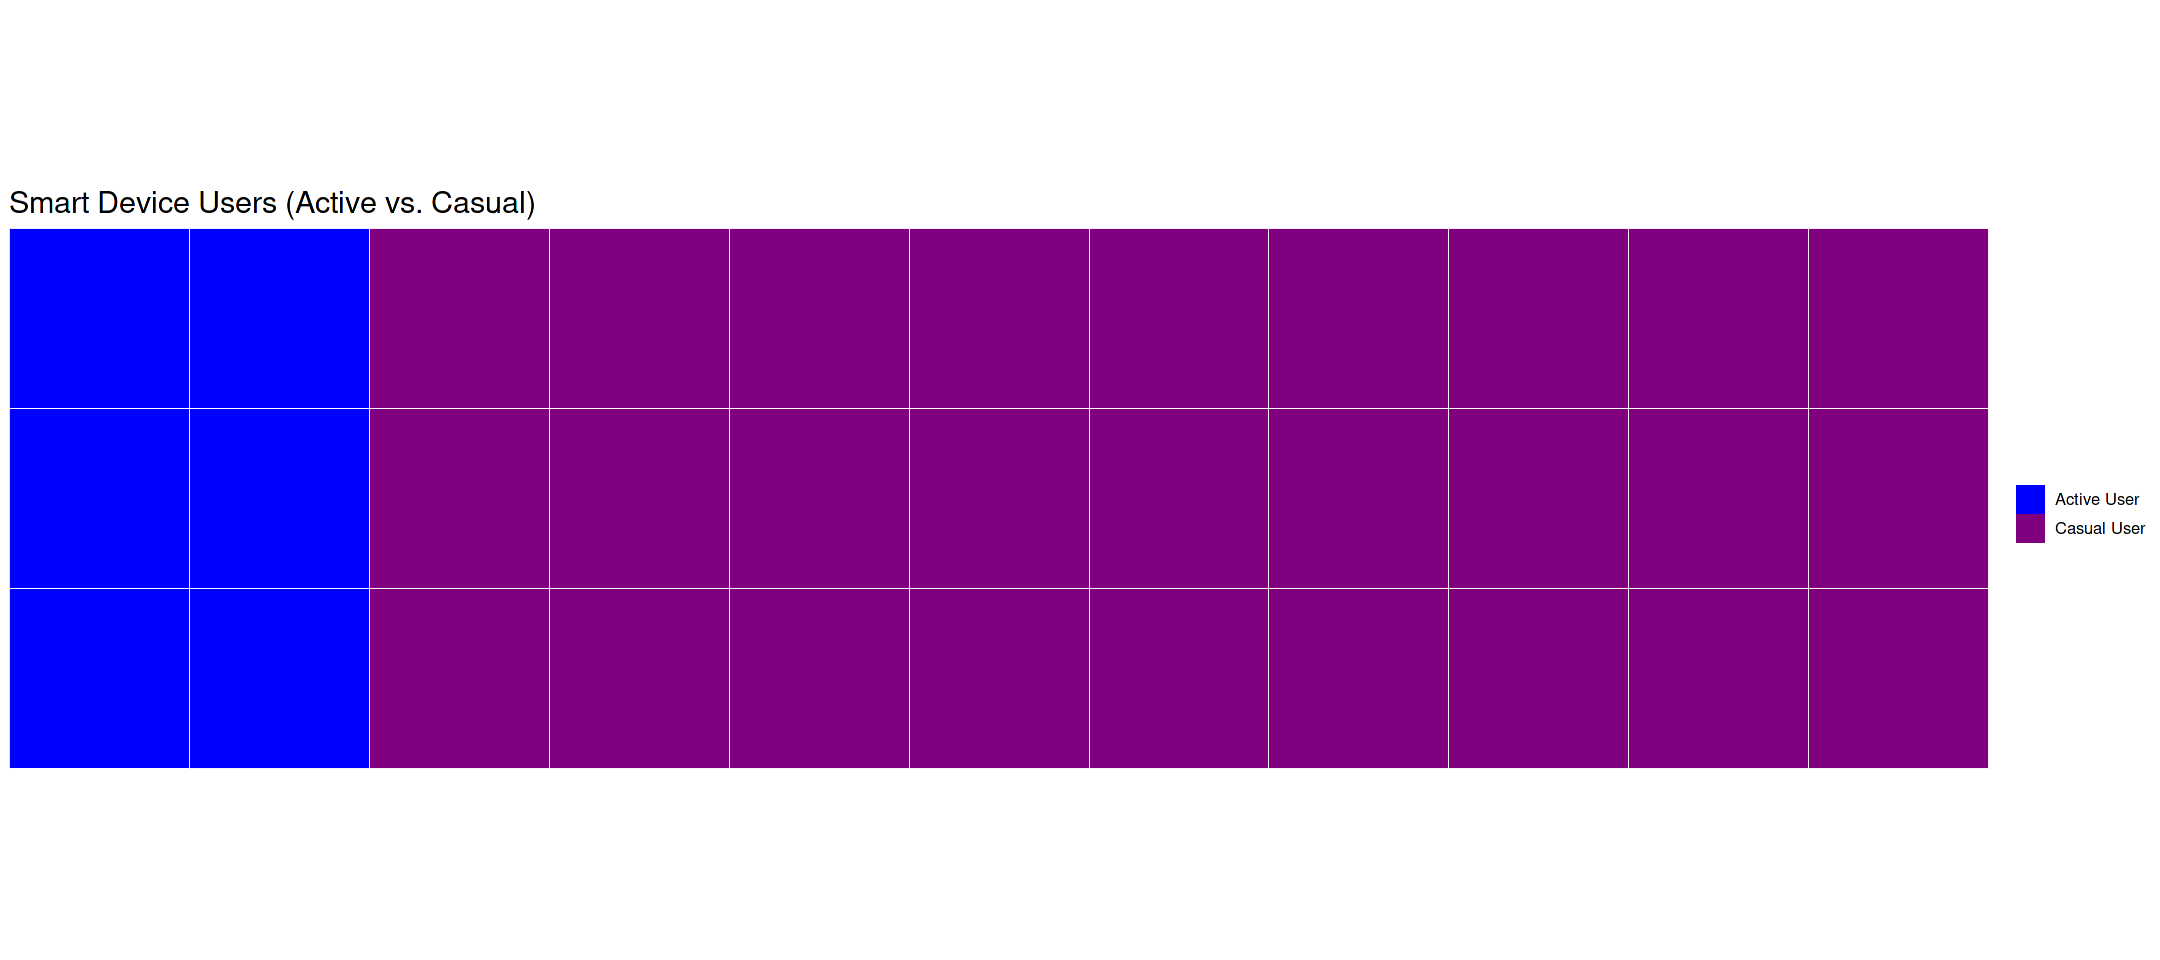

In [15]:
options(repr.plot.width=18,repr.plot.height=8)

waffle(table(type$UserType), title="Smart Device Users (Active vs. Casual)", rows = 3,size=0.2,colors=c("#0000ff","#800080"))+
theme(text = element_text(size = 12))

# Calories burned (Active vs. Casual users)
#### Active users unsurprisingly burn more calories than casual users.

The median rate of calories burned for active users is 1500 calories larger than casual users (3500 vs. 2000 respectively).

The range of calories burned for Casual users is larger than that of active users, this can be explained by the casual users' inconsistency.

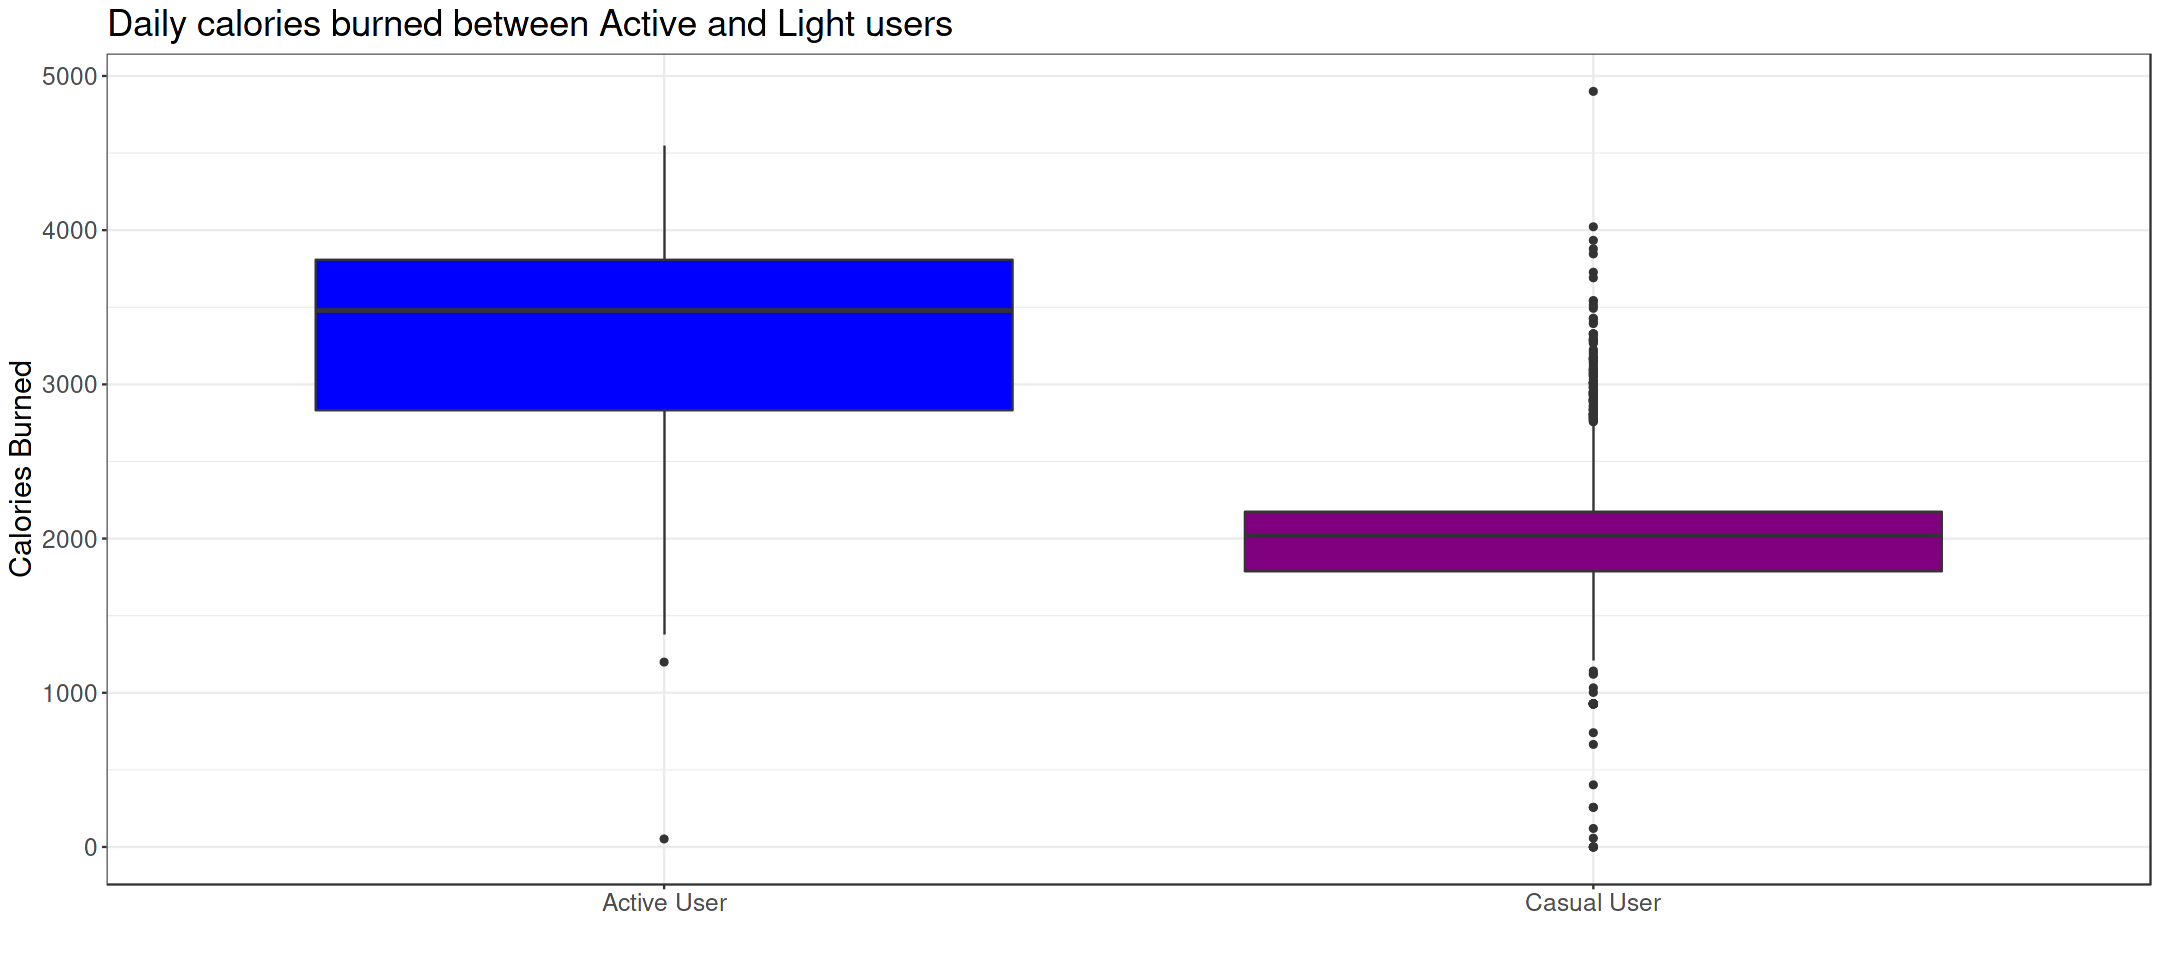

In [16]:
options(repr.plot.width=18,repr.plot.height=8)

ggplot(combinedAS_clean)+
  geom_boxplot(aes(x=UserType,y=Calories),fill=c("#0000ff","#800080"))+
labs(title="Daily calories burned between Active and Light users",x="",y="Calories Burned")+
theme_bw()+
theme(text = element_text(size = 18))

# Heart rates and Calories burned daily
##### As explored previously, active users burn significantly more calories than casual users. This graph confirms that and goes further into showing that active users spend significantly more time on high to intensive activities than casual users.

##### Another interesting phenomenon we can see here is that casual users reach very high heartrates within very short active minutes while active users can spend close to 200 minutes on intensive activities all the while keeping their heartrate stable.

`geom_smooth()` using formula 'y ~ x'



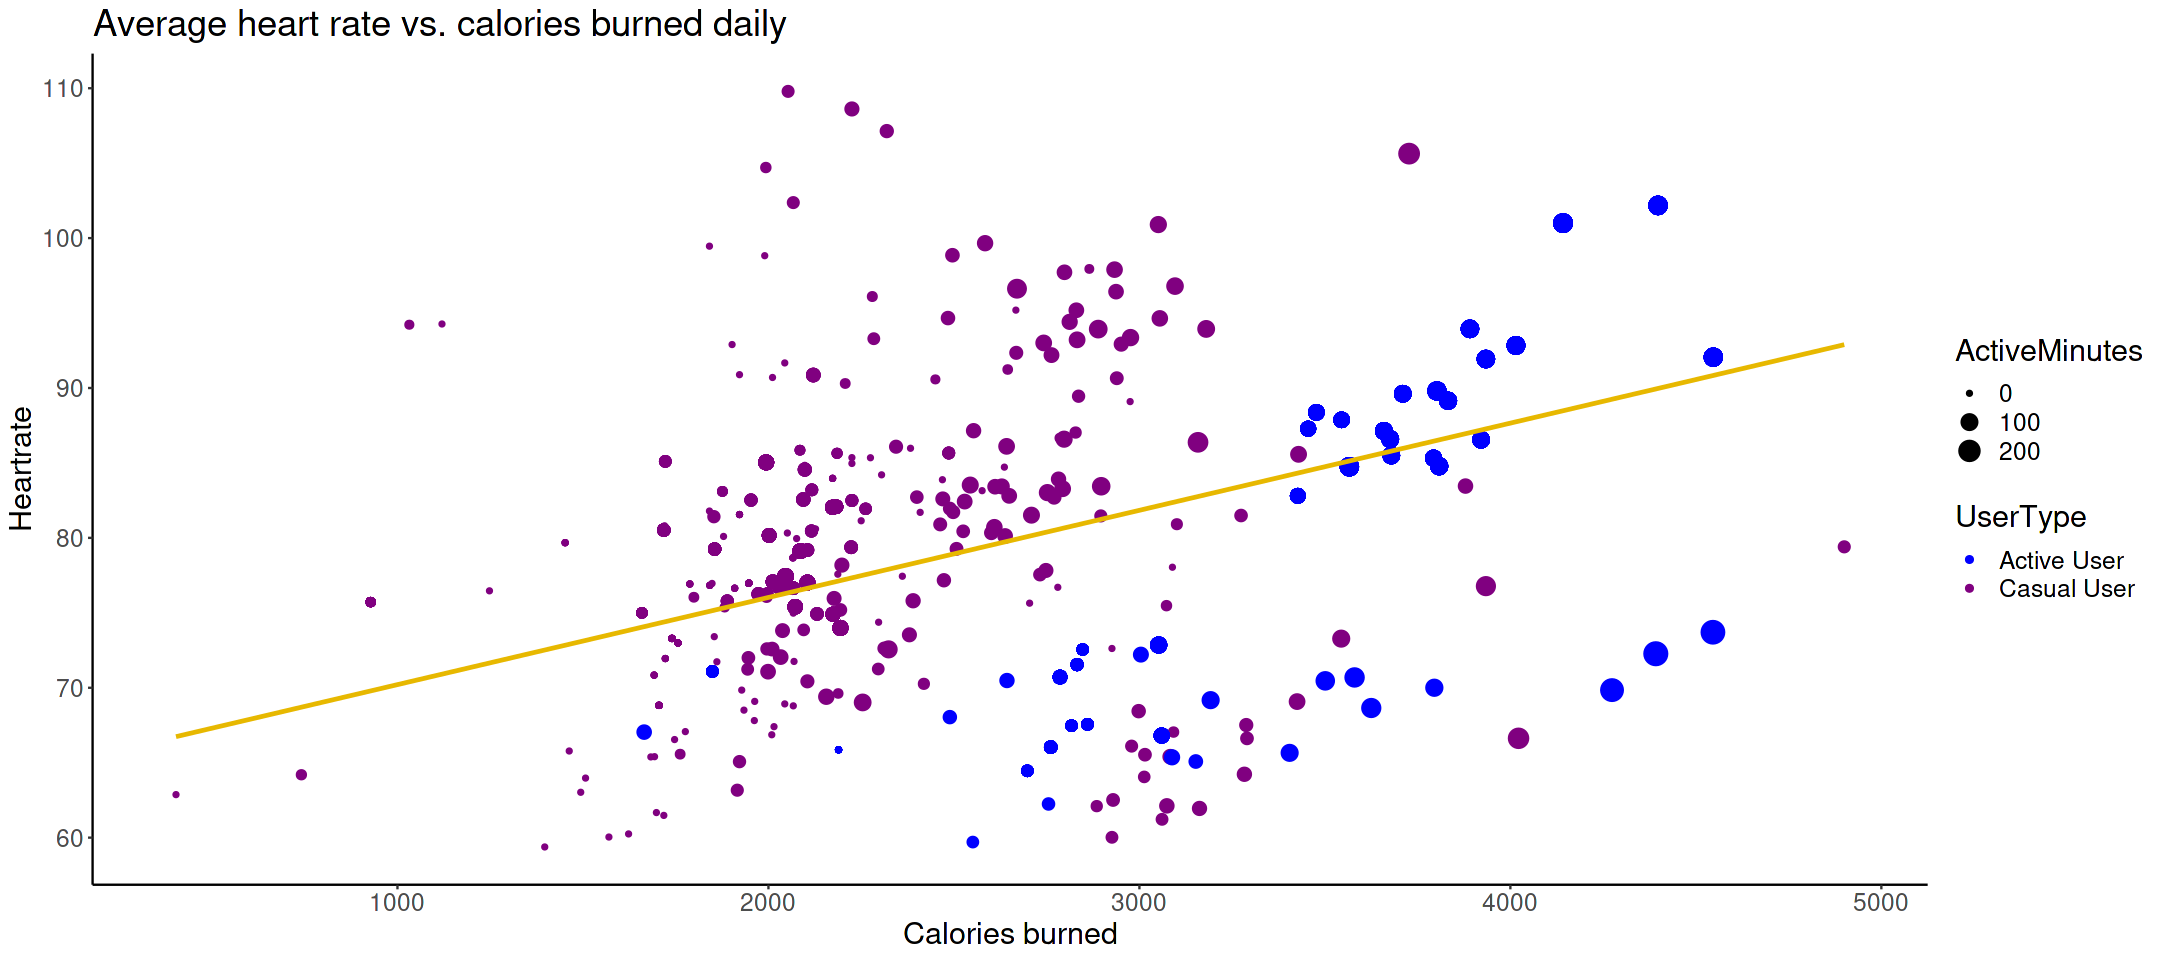

In [17]:
options(repr.plot.width=18,repr.plot.height=8)

ggplot(combinedAS_clean %>% filter(!is.na(Heartrate)))+
  geom_point(aes(x=Calories,y=Heartrate,colour=UserType,size=ActiveMinutes))+
  geom_smooth(aes(x=Calories,y=Heartrate),method=lm,se=FALSE,size=1,color="#E7B800")+
    scale_color_manual(values=c("#0000ff","#800080"))+
  theme_classic()+
  labs(title = "Average heart rate vs. calories burned daily",x="Calories burned",y="Heartrate")+
theme(text = element_text(size = 18))

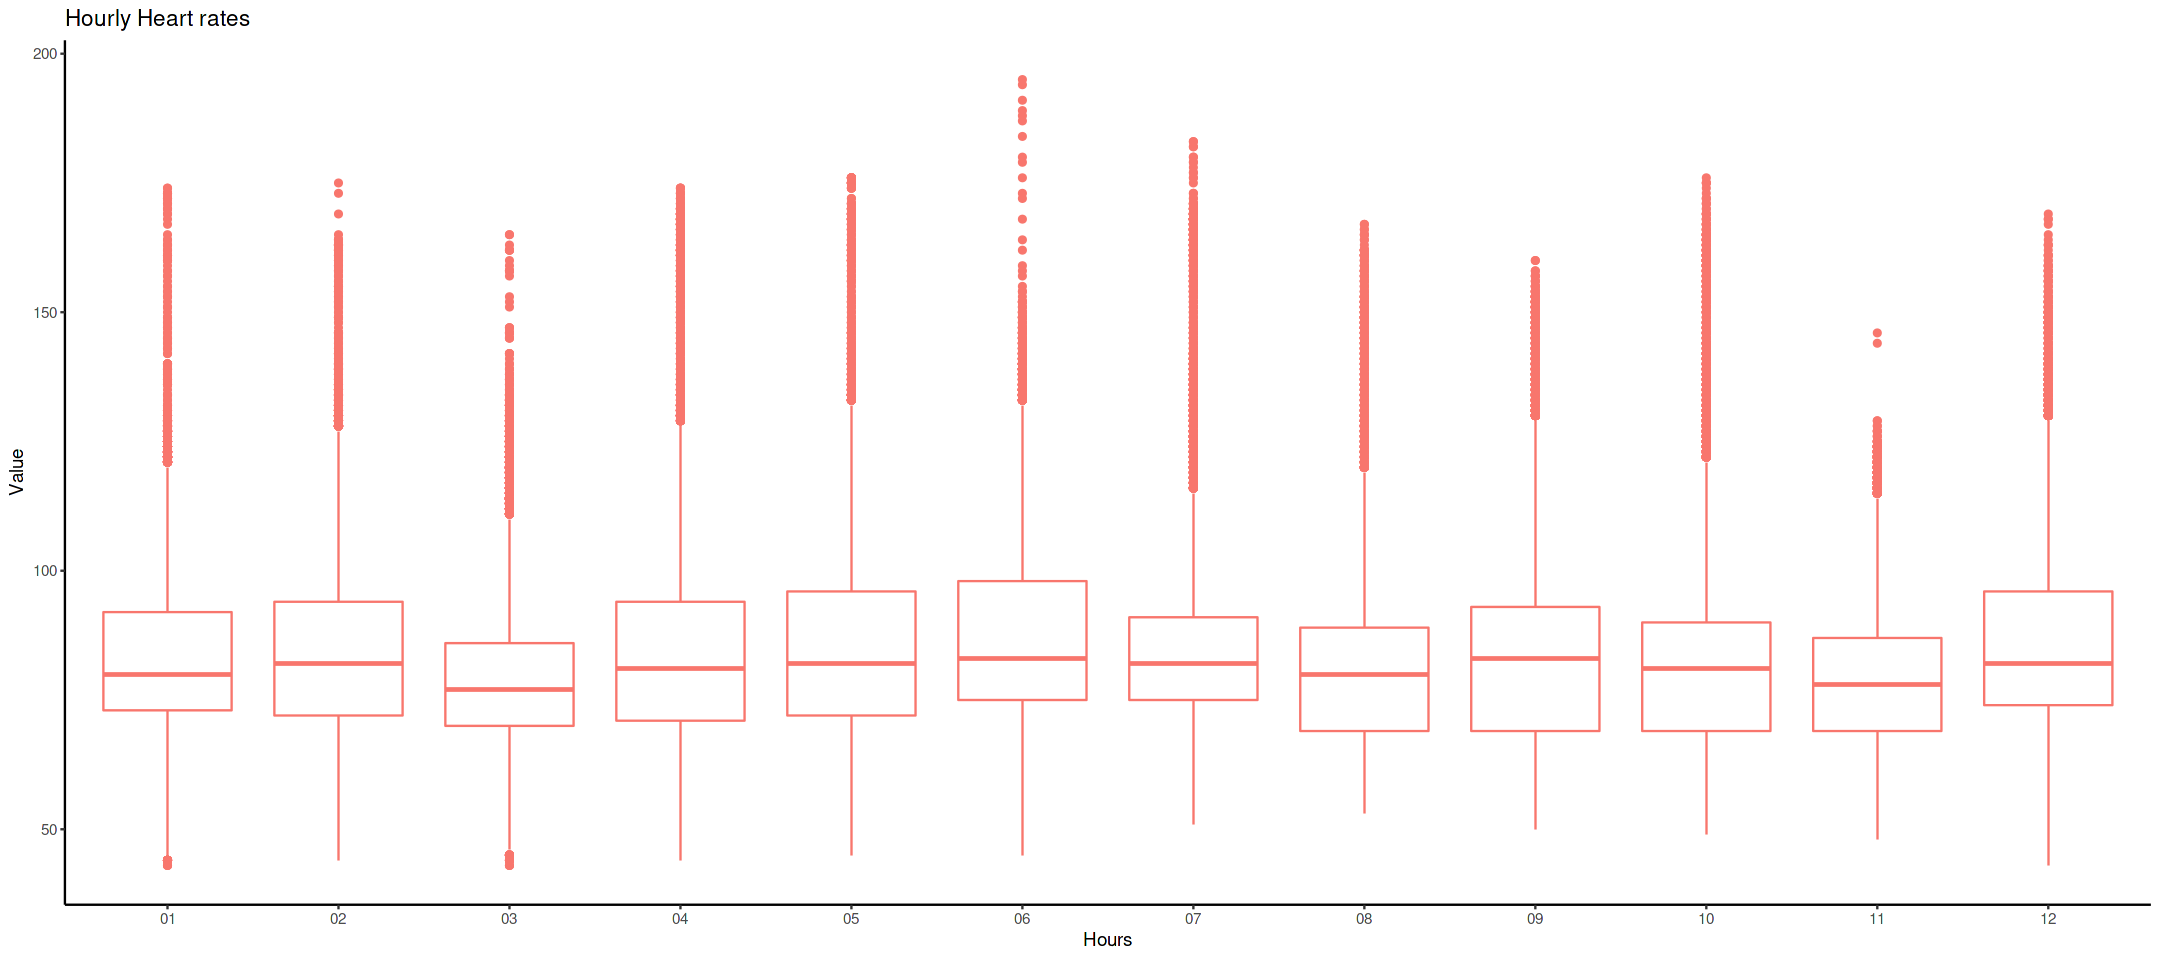

In [18]:
agg_heartrateseconds <- heartrateseconds %>% group_by(Id,Time) %>% summarize_at("Value",mean)
agg_heartrateseconds$Value <- round(agg_heartrateseconds$Value)
agg_heartrateseconds$Hours <- format(strptime(agg_heartrateseconds$Time,"%H:%M:%S"),'%H')

options(repr.plot.width=18,repr.plot.height=8)

ggplot(agg_heartrateseconds,aes(x=Hours,y=Value))+geom_boxplot(color="#F8766D")+labs(title="Hourly Heart rates")+
theme(text = element_text(size = 36))+

scale_fill_grey(start=1, end=12)+ theme_classic()

Within a 12-hour cycle, the data shows a peak in heartrate from 6am to 7am which conforms the hypothesis that most people do intensive activities around that time frame.

# Key Takeaways
The majority of smart device users are casual users who are probably aiming to get healthier and potentially lose some weight (I tried to analyse the BMI metric to prove that most users are overweight but the sample size was very limited to conduct the analysis with less than 10 observations) therefore it's recommended to target casual users in the marketing strategy.

Active users burn significantly more calories

The insights depicted in the heartrate and calorie visualizations show that active users' heartrates are significantly more stable which can be a motivator for people that are looking to get healthier to buy the product to monitor their activities.